In [5]:
import joblib
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [6]:
with open("model.pkl", "rb") as f:
    model = joblib.load(f)

In [7]:
def pred(model, a, b, c, d):
    res = []
    for x in np.arange(-5.0, 5.0, 0.1):
        for y in np.arange(-5.0, 5.0, 0.1):
            res.append(model.predict([[x, y, a, b, c, d]]))
    return np.array(res).reshape([100, 100])

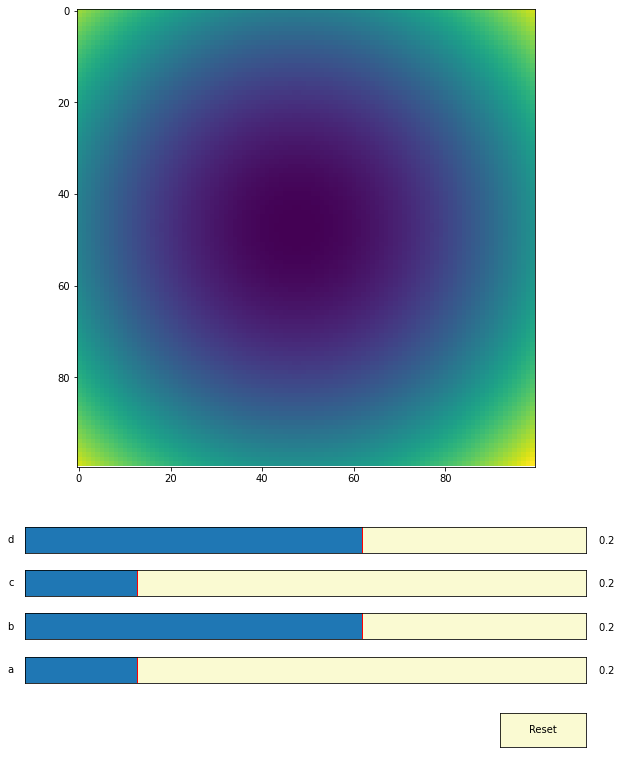

In [12]:

fig, ax = plt.subplots(figsize=(12, 12))
plt.subplots_adjust(left=0.25, bottom=0.35)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
a = 0.2
b = 0.2
c = 0.2
d = 0.2

s = pred(model, a, b, c, d)
im = plt.imshow(s)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axa = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axb = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axc = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axd = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)

sa = Slider(axa, 'a', 0.0, 1.0, valinit=a)
sb = Slider(axb, 'b', -1.0, 1.0, valinit=b)
sc = Slider(axc, 'c', 0.0, 1.0, valinit=c)
sd = Slider(axd, 'd', -1.0, 1.0, valinit=d)


def update(val):
    a = sa.val
    b = sb.val
    c = sc.val
    d = sd.val
    im.set_data(pred(model, a, b, c, d))
    fig.canvas.draw_idle()
    # amp = samp.val
    # freq = sfreq.val
    # l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    # fig.canvas.draw_idle()


sa.on_changed(update)
sb.on_changed(update)
sc.on_changed(update)
sd.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sa.reset()
    sb.reset()
    sc.reset()
    sd.reset()
button.on_clicked(reset)

# rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
# radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


# def colorfunc(label):
#     im.set_color(label)
#     fig.canvas.draw_idle()
# radio.on_clicked(colorfunc)

# Initialize plot with correct initial active value
# colorfunc(radio.value_selected)

plt.show()

In [10]:
s = pred(model, 0.1, 0.1, 0, 0)

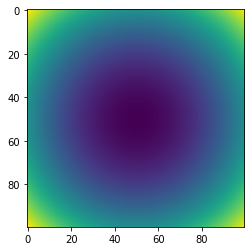

In [11]:
plt.imshow(s)